In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from pathlib import Path
import os

In [2]:
# Tensorflow Libraries
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Import helper functions

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, compare_historys, walk_through_dir, pred_and_plot

--2024-06-08 13:13:31--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-06-08 13:13:31 (75.0 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [4]:
pip install keras.preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 670.0 kB/s eta 0:00:00


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
base_dir = "/content/drive/MyDrive/Colab Notebooks/Daun Herbal/dataset_split"
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')
classes = ["Sirih","Seledri","Pepaya","Pandan","Nangka","Lidah Buaya","Kemangi","Jeruk Nipis","Jambu Biji","Belimbing Wuluh"]

sirih_train_path = os.path.join(train_dir, 'Sirih')
seledri_train_path = os.path.join(train_dir, 'Seledri')
pepaya_train_path = os.path.join(train_dir, 'Pepaya')
pandan_train_path = os.path.join(train_dir, 'Pandan')
nangka_train_path = os.path.join(train_dir, 'Nangka')
lidahbuaya_train_path = os.path.join(train_dir, 'Lidah Buaya')
kemangi_train_path = os.path.join(train_dir, 'Kemangi')
jeruk_train_path = os.path.join(train_dir, 'Jeruk Nipis')
jambubiji_train_path = os.path.join(train_dir, 'Jambu Biji')
belimbingwuluh_train_path = os.path.join(train_dir, 'Belimbing Wuluh')

sirih_val_path = os.path.join(val_dir, 'Sirih')
seledri_val_path = os.path.join(val_dir, 'Seledri')
pepaya_val_path = os.path.join(val_dir, 'Pepaya')
pandan_val_path = os.path.join(val_dir, 'Pandan')
nangka_val_path = os.path.join(val_dir, 'Nangka')
lidahbuaya_val_path = os.path.join(val_dir, 'Lidah Buaya')
kemangi_val_path = os.path.join(val_dir, 'Kemangi')
jeruk_val_path = os.path.join(val_dir, 'Jeruk Nipis')
jambubiji_val_path = os.path.join(val_dir, 'Jambu Biji')
belimbingwuluh_val_path = os.path.join(val_dir, 'Belimbing Wuluh')

len_sirih_train = len(os.listdir(sirih_train_path))
len_seledri_train = len(os.listdir(seledri_train_path))
len_pepaya_train = len(os.listdir(pepaya_train_path))
len_pandan_train = len(os.listdir(pandan_train_path))
len_nangka_train = len(os.listdir(nangka_train_path))
len_lidahbuaya_train = len(os.listdir(lidahbuaya_train_path))
len_kemangi_train = len(os.listdir(kemangi_train_path))
len_jeruk_train = len(os.listdir(jeruk_train_path))
len_jambubiji_train = len(os.listdir(jambubiji_train_path))
len_belimbingwuluh_train = len(os.listdir(belimbingwuluh_train_path))

len_sirih_val = len(os.listdir(sirih_val_path))
len_seledri_val = len(os.listdir(seledri_val_path))
len_pepaya_val = len(os.listdir(pepaya_val_path))
len_pandan_val = len(os.listdir(pandan_val_path))
len_nangka_val = len(os.listdir(nangka_val_path))
len_lidahbuaya_val = len(os.listdir(lidahbuaya_val_path))
len_kemangi_val = len(os.listdir(kemangi_val_path))
len_jeruk_val = len(os.listdir(jeruk_val_path))
len_jambubiji_val = len(os.listdir(jambubiji_val_path))
len_belimbingwuluh_val = len(os.listdir(belimbingwuluh_val_path))

print("Panjang train:", str(len_sirih_train + len_seledri_train + len_pepaya_train + len_pandan_train + len_nangka_train + len_lidahbuaya_train + len_kemangi_train + len_jeruk_train + len_jambubiji_train + len_belimbingwuluh_train))
print("Panjang validation:", str(len_sirih_val + len_seledri_val + len_pepaya_val + len_pandan_val + len_nangka_val + len_lidahbuaya_val + len_kemangi_val + len_jeruk_val + len_jambubiji_val + len_belimbingwuluh_val))

print('''\n==== Jumlah data train ====
Panjang data train Sirih: {}
Panjang data train Seledri: {}
Panjang data train Pepaya: {}
Panjang data train Pandan: {}
Panjang data train Nangka: {}
Panjang data train Lidah Buaya: {}
Panjang data train Kemangi: {}
Panjang data train Jeruk Nipis: {}
Panjang data train Jambu Biji: {}
Panjang data train Belimbing Wuluh: {}
'''.format(len_sirih_train, len_seledri_train, len_pepaya_train, len_pandan_train, len_nangka_train, len_lidahbuaya_train, len_kemangi_train, len_jeruk_train, len_jambubiji_train, len_belimbingwuluh_train))

print('''\n==== Jumlah data validation ====
Panjang data validation Sirih: {}
Panjang data validation Seledri: {}
Panjang data validation Pepaya: {}
Panjang data validation Pandan: {}
Panjang data validation Nangka: {}
Panjang data validation Lidah Buaya: {}
Panjang data validation Kemangi: {}
Panjang data validation Jeruk Nipis: {}
Panjang data validation Jambu Biji: {}
Panjang data validation Belimbing Wuluh: {}
'''.format(len_sirih_val, len_seledri_val, len_pepaya_val, len_pandan_val, len_nangka_val, len_lidahbuaya_val, len_kemangi_val, len_jeruk_val, len_jambubiji_val, len_belimbingwuluh_val))

Panjang train: 2440
Panjang validation: 700

==== Jumlah data train ====
Panjang data train Sirih: 244
Panjang data train Seledri: 244
Panjang data train Pepaya: 244
Panjang data train Pandan: 244
Panjang data train Nangka: 244
Panjang data train Lidah Buaya: 244
Panjang data train Kemangi: 244
Panjang data train Jeruk Nipis: 244
Panjang data train Jambu Biji: 244
Panjang data train Belimbing Wuluh: 244


==== Jumlah data validation ====
Panjang data validation Sirih: 70
Panjang data validation Seledri: 70
Panjang data validation Pepaya: 70
Panjang data validation Pandan: 70
Panjang data validation Nangka: 70
Panjang data validation Lidah Buaya: 70
Panjang data validation Kemangi: 70
Panjang data validation Jeruk Nipis: 70
Panjang data validation Jambu Biji: 70
Panjang data validation Belimbing Wuluh: 70



In [7]:
train_sirih_fnames = os.listdir(sirih_train_path)
train_seledri_fnames = os.listdir(seledri_train_path)
train_pepaya_fnames = os.listdir(pepaya_train_path)
train_pandan_fnames = os.listdir(pandan_train_path)
train_nangka_fnames = os.listdir(nangka_train_path)
train_lidahbuaya_fnames = os.listdir(lidahbuaya_train_path)
train_kemangi_fnames = os.listdir(kemangi_train_path)
train_jeruk_fnames = os.listdir(jeruk_train_path)
train_jambubiji_fnames = os.listdir(jambubiji_train_path)
train_belimbingwuluh_fnames = os.listdir(belimbingwuluh_train_path)

print(train_sirih_fnames[:10])
print(train_seledri_fnames[:10])
print(train_pepaya_fnames[:10])
print(train_pandan_fnames[:10])
print(train_nangka_fnames[:10])
print(train_lidahbuaya_fnames[:10])
print(train_kemangi_fnames[:10])
print(train_jeruk_fnames[:10])
print(train_jambubiji_fnames[:10])
print(train_belimbingwuluh_fnames[:10])

['Sirih277.jpg', 'Sirih262.jpg', 'Sirih257.jpg', 'Sirih298.jpg', 'Sirih294.jpg', 'Sirih287.jpg', 'Sirih246.jpg', 'Sirih208.jpg', 'Sirih315.jpg', 'Sirih260.jpg']
['Seledri016.jpg', 'Seledri062.jpg', 'Seledri068.jpg', 'Seledri020.jpg', 'Seledri069.jpg', 'Seledri102.jpg', 'Seledri075.jpg', 'Seledri047.jpg', 'Seledri057.jpg', 'Seledri107.jpg']
['Pepaya124.jpg', 'Pepaya116.jpg', 'Pepaya042.jpg', 'Pepaya051.jpg', 'Pepaya049.jpg', 'Pepaya070.jpg', 'Pepaya125.jpg', 'Pepaya087.jpg', 'Pepaya044.jpg', 'Pepaya075.jpg']
['Pandan008.jpg', 'Pandan002.jpg', 'Pandan004.jpg', 'Pandan003.jpg', 'Pandan005.jpg', 'Pandan006.jpg', 'Pandan001.jpg', 'Pandan133.jpg', 'Pandan252.jpg', 'Pandan325.jpg']
['Nangka347.jpg', 'Nangka030.jpg', 'Nangka069.jpg', 'Nangka057.jpg', 'Nangka242.jpg', 'Nangka290.jpg', 'Nangka220.jpg', 'Nangka073.jpg', 'Nangka178.jpg', 'Nangka107.jpg']
['Lidah buaya147.jpg', 'Lidah buaya338.jpg', 'Lidah buaya269.jpg', 'Lidah buaya298.jpg', 'Lidah buaya104.jpg', 'Lidah buaya180.jpg', 'Lidah buaya

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 10
ncols = 8

pic_index = 0

['/content/drive/MyDrive/Colab Notebooks/Daun Herbal/dataset_split/train/Sirih/Sirih277.jpg', '/content/drive/MyDrive/Colab Notebooks/Daun Herbal/dataset_split/train/Sirih/Sirih262.jpg', '/content/drive/MyDrive/Colab Notebooks/Daun Herbal/dataset_split/train/Sirih/Sirih257.jpg', '/content/drive/MyDrive/Colab Notebooks/Daun Herbal/dataset_split/train/Sirih/Sirih298.jpg', '/content/drive/MyDrive/Colab Notebooks/Daun Herbal/dataset_split/train/Sirih/Sirih294.jpg', '/content/drive/MyDrive/Colab Notebooks/Daun Herbal/dataset_split/train/Sirih/Sirih287.jpg', '/content/drive/MyDrive/Colab Notebooks/Daun Herbal/dataset_split/train/Sirih/Sirih246.jpg', '/content/drive/MyDrive/Colab Notebooks/Daun Herbal/dataset_split/train/Sirih/Sirih208.jpg']


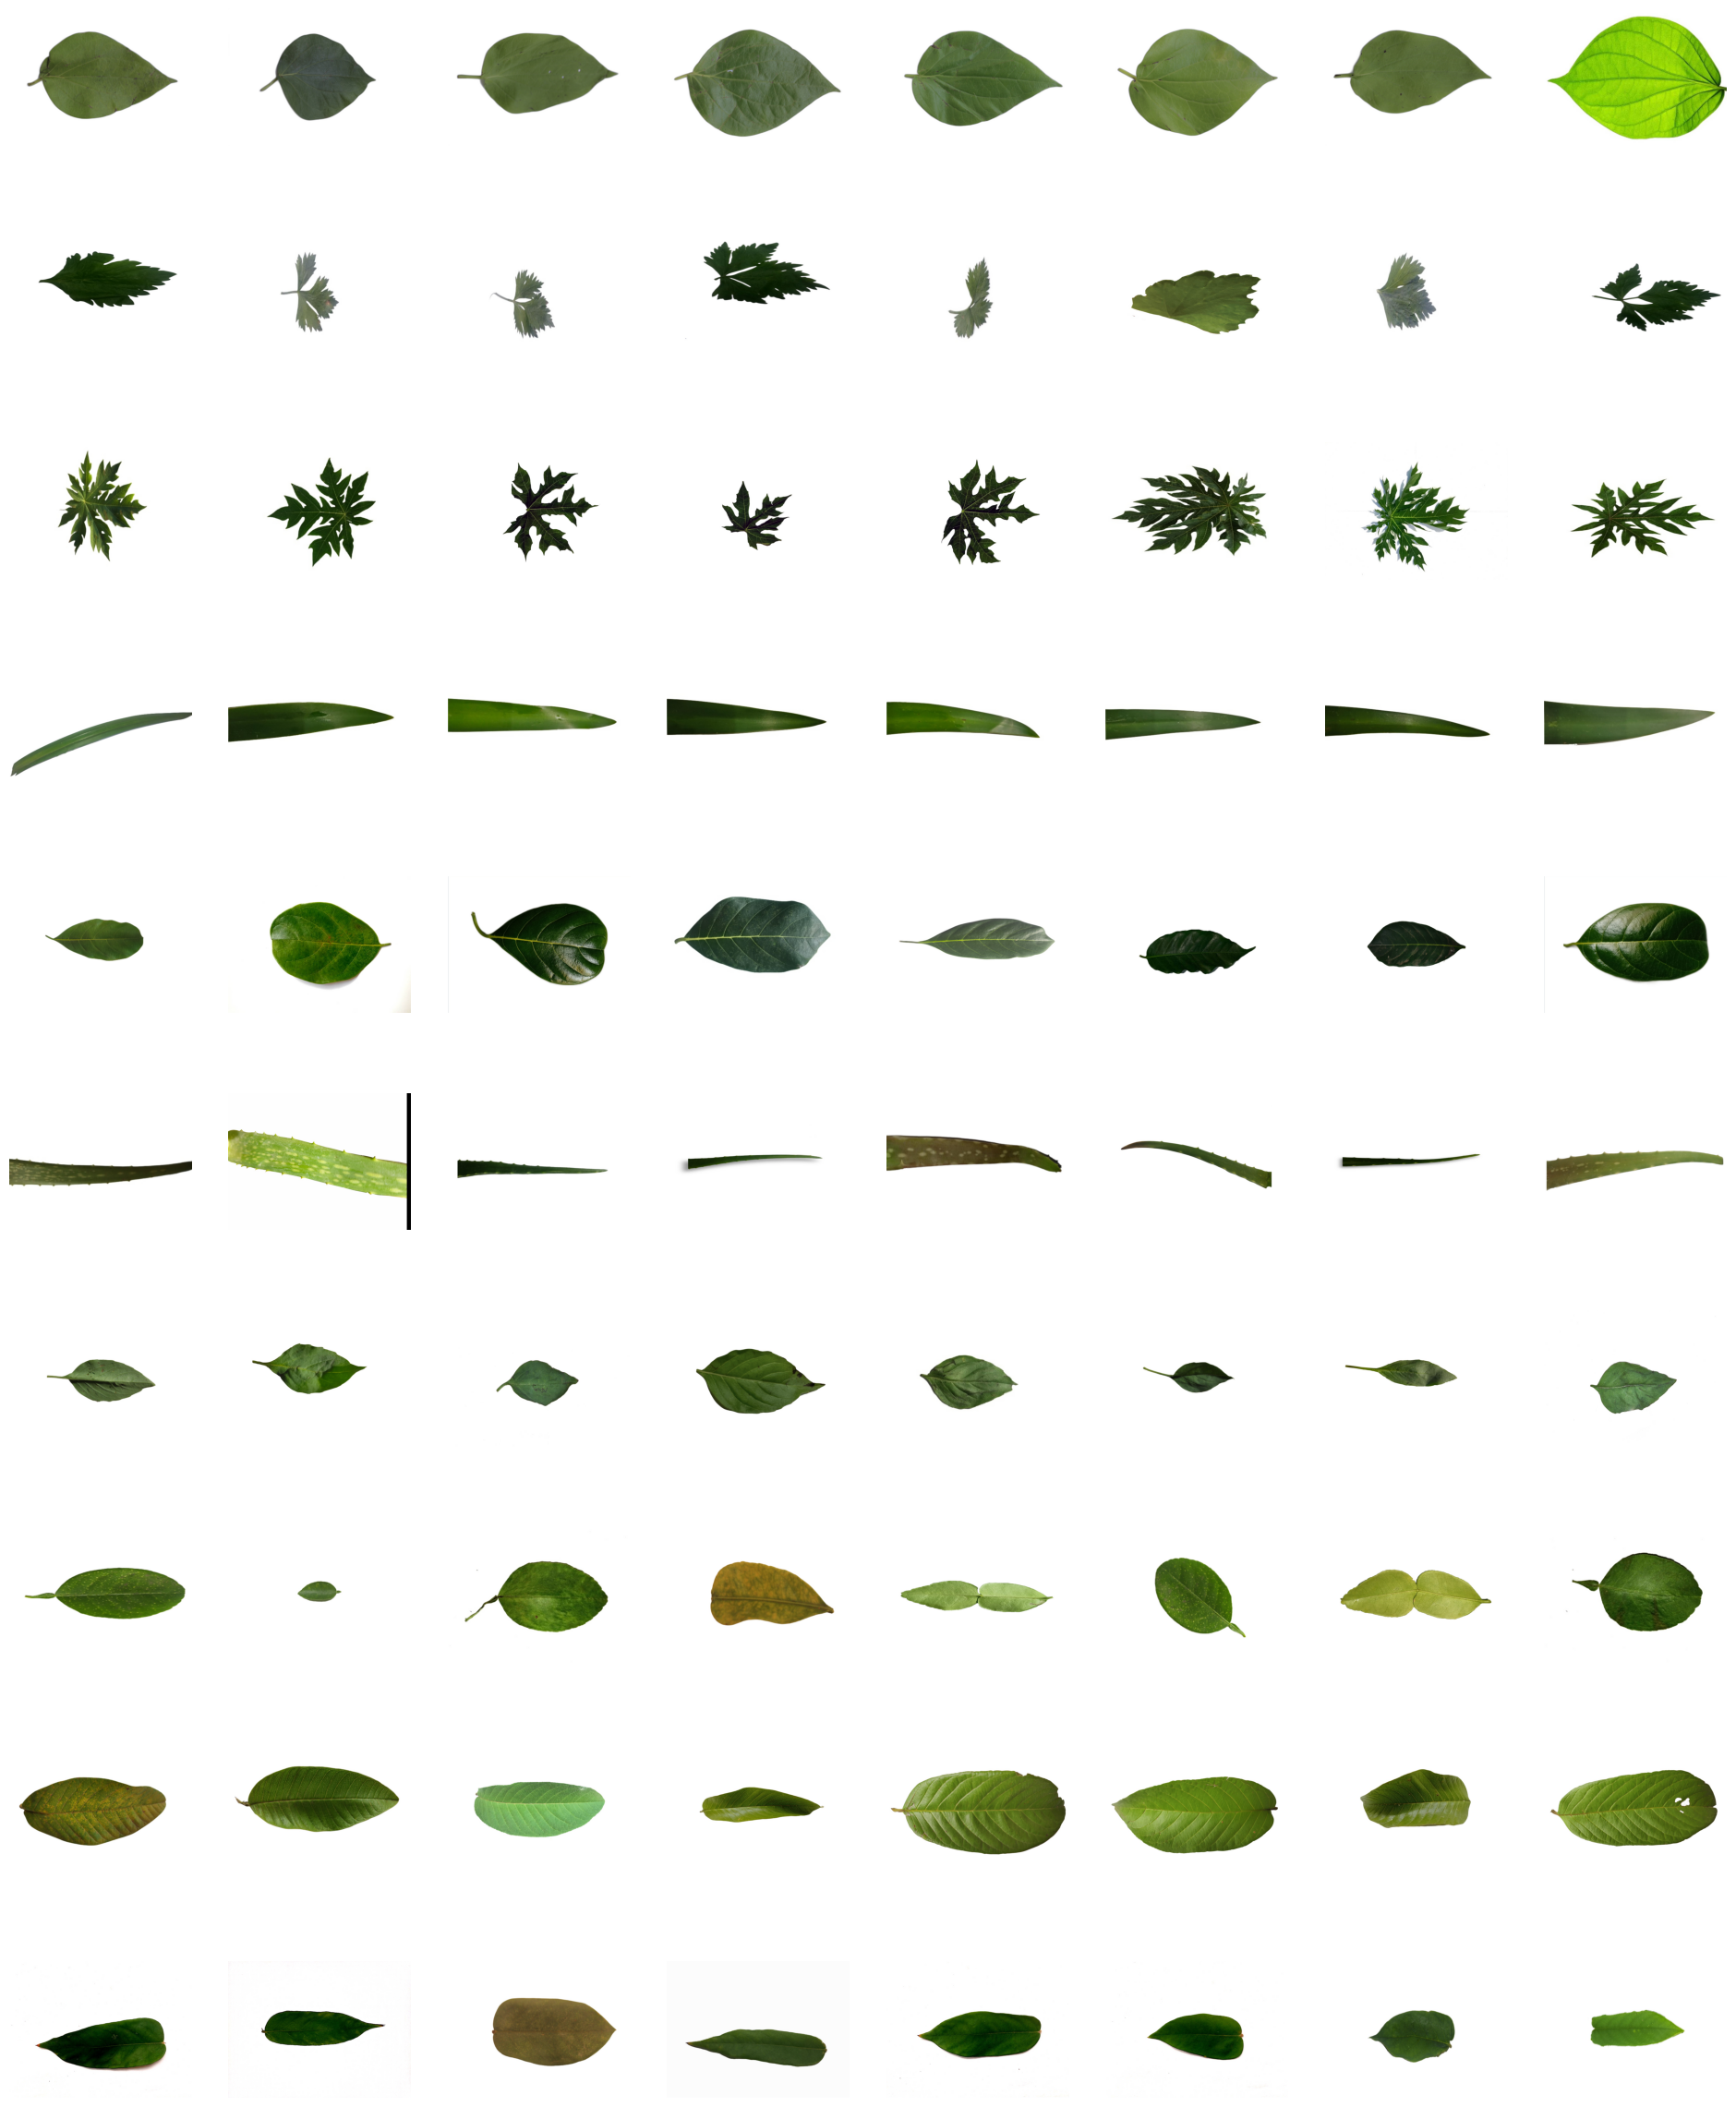

In [9]:
fig = plt.gcf()
fig.set_size_inches(ncols*3, nrows*3)

pic_index += 8

next_sirih_pix = [os.path.join(sirih_train_path, fname)
                  for fname in train_sirih_fnames[ pic_index-8:pic_index]
                 ]
next_seledri_pix = [os.path.join(seledri_train_path, fname)
                  for fname in train_seledri_fnames[ pic_index-8:pic_index]
                 ]
next_pepaya_pix = [os.path.join(pepaya_train_path, fname)
                    for fname in train_pepaya_fnames[ pic_index-8:pic_index]
                  ]
next_pandan_pix = [os.path.join(pandan_train_path, fname)
                    for fname in train_pandan_fnames[ pic_index-8:pic_index]
                  ]
next_nangka_pix = [os.path.join(nangka_train_path, fname)
                    for fname in train_nangka_fnames[ pic_index-8:pic_index]
                  ]
next_lidahbuaya_pix = [os.path.join(lidahbuaya_train_path, fname)
                    for fname in train_lidahbuaya_fnames[ pic_index-8:pic_index]
                  ]
next_kemangi_pix = [os.path.join(kemangi_train_path, fname)
                    for fname in train_kemangi_fnames[ pic_index-8:pic_index]
                  ]
next_jeruk_pix = [os.path.join(jeruk_train_path, fname)
                    for fname in train_jeruk_fnames[ pic_index-8:pic_index]
                  ]
next_jambubiji_pix = [os.path.join(jambubiji_train_path, fname)
                    for fname in train_jambubiji_fnames[ pic_index-8:pic_index]
                  ]
next_belimbingwuluh_pix = [os.path.join(belimbingwuluh_train_path, fname)
                    for fname in train_belimbingwuluh_fnames[ pic_index-8:pic_index]
                  ]

print(next_sirih_pix)

for i, img_path in enumerate(next_sirih_pix + next_seledri_pix + next_pepaya_pix + next_pandan_pix + next_nangka_pix + next_lidahbuaya_pix + next_kemangi_pix + next_jeruk_pix + next_jambubiji_pix + next_belimbingwuluh_pix):
  sp =  plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [10]:
# Definisikan ukuran gambar
image_size = [224, 224]

# Muat arsitektur MobileNetV2 dengan bobot dari ImageNet, tanpa lapisan fully connected di bagian atas (include_top=False)
mobilenetv2 = MobileNetV2(input_shape=image_size + [3], weights='imagenet', include_top=False)

9406464/9406464 [==============================] - 0s 0us/step


In [11]:
# Lakukan flattening pada output dari MobileNetV2
x = Flatten()(mobilenetv2.output)

# Tambahkan lapisan dense dengan 512 unit dan aktivasi ReLU
x = Dense(512, activation='relu')(x)

# Tambahkan lapisan output dengan 10 unit dan aktivasi softmax untuk klasifikasi 10 kelas
prediction = Dense(10, activation='softmax')(x)

In [12]:
# Bentuk model dengan input dari MobileNetV2 dan output dari lapisan prediksi
model = Model(inputs=mobilenetv2.input, outputs=prediction)

# Tampilkan ringkasan arsitektur model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

In [13]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.3,
    zoom_range = 0.3,
    rotation_range = 30,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest',
)
validation_datagen = ImageDataGenerator(
    rescale = 1./255,
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle=True,
)

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = False,
)

test_datagen = ImageDataGenerator(
    rescale = 1./255,
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = False,
)

Found 2440 images belonging to 10 classes.
Found 700 images belonging to 10 classes.
Found 360 images belonging to 10 classes.


In [14]:
image_list = []
label_list = []

for class_name in classes:
    class_path = os.path.join(train_dir, class_name)
    for image_name in os.listdir(class_path):
        image_list.append(os.path.join(class_path, image_name))
        label_list.append(class_name)

image_df = pd.DataFrame({'Filepath': image_list, 'Label': label_list})

In [15]:
# Variable definitions
BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)
num_classes = len(image_df['Label'].unique())
k_folds = 10
epochs = 50  # Anda dapat mengubah jumlah epochs sesuai kebutuhan

# Stratified K-Fold Cross-Validation
kfold = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)
fold_no = 1
results = []

# Data Generators
data_generator = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)

In [16]:
# Menggabungkan history dari setiap fold
all_history = {
    'accuracy': [],
    'val_accuracy': [],
    'loss': [],
    'val_loss': []
}

for train_idx, val_idx in kfold.split(image_df['Filepath'], image_df['Label']):
    train_df = image_df.iloc[train_idx]
    val_df = image_df.iloc[val_idx]

    train_images = data_generator.flow_from_dataframe(
        dataframe=train_df,
        x_col='Filepath',
        y_col='Label',
        target_size=IMAGE_SIZE,
        color_mode='rgb',
        class_mode='categorical',
        batch_size=BATCH_SIZE,
        shuffle=True,
        seed=42
    )

    val_images = data_generator.flow_from_dataframe(
        dataframe=val_df,
        x_col='Filepath',
        y_col='Label',
        target_size=IMAGE_SIZE,
        color_mode='rgb',
        class_mode='categorical',
        batch_size=BATCH_SIZE,
        shuffle=True,
        seed=42
    )

    # Model setup
    pretrained_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')
    pretrained_model.trainable = False
    inputs = pretrained_model.input

    # Flatten the output layer from the pretrained model
    x = Flatten()(pretrained_model.output)

    # Add fully connected layers
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.2)(x)

    # Add output layer
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer=Adam(0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

    # Callbacks
    checkpoint_path = f"/content/drive/MyDrive/Colab Notebooks/Daun Herbal/herbal_leaf_classification_model_checkpoint_fold_{fold_no}"
    checkpoint_callback = ModelCheckpoint(
        checkpoint_path,
        save_weights_only=True,
        monitor="val_accuracy",
        save_best_only=True
    )
    model_checkpoint = ModelCheckpoint(
        f'/content/drive/MyDrive/Colab Notebooks/Daun Herbal/best_model_fold_{fold_no}.h5',
        monitor='val_loss',
        mode='min',
        save_best_only=True,
        verbose=1
    )

    early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

    print(f"Training fold {fold_no} ...")
    history_kfold = model.fit(
        train_images,
        steps_per_epoch=len(train_images),
        validation_data=val_images,
        validation_steps=len(val_images),
        epochs=epochs,
        callbacks=[early_stopping, checkpoint_callback, model_checkpoint]
    )

    # Simpan history dari setiap fold
    all_history['accuracy'].extend(history_kfold.history['accuracy'])
    all_history['val_accuracy'].extend(history_kfold.history['val_accuracy'])
    all_history['loss'].extend(history_kfold.history['loss'])
    all_history['val_loss'].extend(history_kfold.history['val_loss'])

    # Load the best model for evaluation
    model.load_weights(f'/content/drive/MyDrive/Colab Notebooks/Daun Herbal/best_model_fold_{fold_no}.h5')

    # Model Evaluation on validation data
    val_results = model.evaluate(val_images, verbose=0)
    print(f"Fold {fold_no} - Validation Loss: {val_results[0]} - Validation Accuracy: {val_results[1] * 100}%")
    results.append(val_results)

    # Get true labels and predictions for the validation set
    val_labels = val_images.classes
    val_preds = model.predict(val_images, verbose=0)
    val_pred_labels = np.argmax(val_preds, axis=1)

    fold_no += 1

# Average results
avg_loss = np.mean([r[0] for r in results])
avg_accuracy = np.mean([r[1] for r in results])
print(f"Average Validation Loss: {avg_loss}")
print(f"Average Validation Accuracy: {avg_accuracy * 100}%")

Found 2196 validated image filenames belonging to 10 classes.
Found 244 validated image filenames belonging to 10 classes.
Training fold 1 ...
Epoch 1/50
69/69 [==============================] - ETA: 0s - loss: 1.3351 - accuracy: 0.5674
Epoch 1: val_loss improved from inf to 0.44859, saving model to /content/drive/MyDrive/Colab Notebooks/Daun Herbal/best_model_fold_1.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


69/69 [==============================] - 600s 9s/step - loss: 1.3351 - accuracy: 0.5674 - val_loss: 0.4486 - val_accuracy: 0.8934
Epoch 2/50
69/69 [==============================] - ETA: 0s - loss: 0.4071 - accuracy: 0.8720
Epoch 2: val_loss improved from 0.44859 to 0.25910, saving model to /content/drive/MyDrive/Colab Notebooks/Daun Herbal/best_model_fold_1.h5
69/69 [==============================] - 155s 2s/step - loss: 0.4071 - accuracy: 0.8720 - val_loss: 0.2591 - val_accuracy: 0.9344
Epoch 3/50
69/69 [==============================] - ETA: 0s - loss: 0.2305 - accuracy: 0.9335
Epoch 3: val_loss improved from 0.25910 to 0.21664, saving model to /content/drive/MyDrive/Colab Notebooks/Daun Herbal/best_model_fold_1.h5
69/69 [==============================] - 148s 2s/step - loss: 0.2305 - accuracy: 0.9335 - val_loss: 0.2166 - val_accuracy: 0.9344
Epoch 4/50
69/69 [==============================] - ETA: 0s - loss: 0.1530 - accuracy: 0.9549
Epoch 4: val_loss improved from 0.21664 to 0.172

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


69/69 [==============================] - 150s 2s/step - loss: 1.2818 - accuracy: 0.5747 - val_loss: 0.3096 - val_accuracy: 0.9344
Epoch 2/50
69/69 [==============================] - ETA: 0s - loss: 0.3724 - accuracy: 0.8912
Epoch 2: val_loss improved from 0.30964 to 0.17339, saving model to /content/drive/MyDrive/Colab Notebooks/Daun Herbal/best_model_fold_2.h5
69/69 [==============================] - 156s 2s/step - loss: 0.3724 - accuracy: 0.8912 - val_loss: 0.1734 - val_accuracy: 0.9467
Epoch 3/50
69/69 [==============================] - ETA: 0s - loss: 0.2268 - accuracy: 0.9303
Epoch 3: val_loss improved from 0.17339 to 0.12451, saving model to /content/drive/MyDrive/Colab Notebooks/Daun Herbal/best_model_fold_2.h5
69/69 [==============================] - 146s 2s/step - loss: 0.2268 - accuracy: 0.9303 - val_loss: 0.1245 - val_accuracy: 0.9672
Epoch 4/50
69/69 [==============================] - ETA: 0s - loss: 0.1482 - accuracy: 0.9590
Epoch 4: val_loss improved from 0.12451 to 0.102

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


69/69 [==============================] - 154s 2s/step - loss: 1.3146 - accuracy: 0.5647 - val_loss: 0.3926 - val_accuracy: 0.8975
Epoch 2/50
69/69 [==============================] - ETA: 0s - loss: 0.4163 - accuracy: 0.8707
Epoch 2: val_loss improved from 0.39255 to 0.21704, saving model to /content/drive/MyDrive/Colab Notebooks/Daun Herbal/best_model_fold_3.h5
69/69 [==============================] - 153s 2s/step - loss: 0.4163 - accuracy: 0.8707 - val_loss: 0.2170 - val_accuracy: 0.9303
Epoch 3/50
69/69 [==============================] - ETA: 0s - loss: 0.2484 - accuracy: 0.9276
Epoch 3: val_loss improved from 0.21704 to 0.16045, saving model to /content/drive/MyDrive/Colab Notebooks/Daun Herbal/best_model_fold_3.h5
69/69 [==============================] - 150s 2s/step - loss: 0.2484 - accuracy: 0.9276 - val_loss: 0.1604 - val_accuracy: 0.9590
Epoch 4/50
69/69 [==============================] - ETA: 0s - loss: 0.1496 - accuracy: 0.9617
Epoch 4: val_loss improved from 0.16045 to 0.125

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


69/69 [==============================] - 157s 2s/step - loss: 1.2763 - accuracy: 0.5920 - val_loss: 0.3885 - val_accuracy: 0.8893
Epoch 2/50
69/69 [==============================] - ETA: 0s - loss: 0.3671 - accuracy: 0.8921
Epoch 2: val_loss improved from 0.38850 to 0.23217, saving model to /content/drive/MyDrive/Colab Notebooks/Daun Herbal/best_model_fold_4.h5
69/69 [==============================] - 159s 2s/step - loss: 0.3671 - accuracy: 0.8921 - val_loss: 0.2322 - val_accuracy: 0.9303
Epoch 3/50
69/69 [==============================] - ETA: 0s - loss: 0.2132 - accuracy: 0.9385
Epoch 3: val_loss improved from 0.23217 to 0.18597, saving model to /content/drive/MyDrive/Colab Notebooks/Daun Herbal/best_model_fold_4.h5
69/69 [==============================] - 157s 2s/step - loss: 0.2132 - accuracy: 0.9385 - val_loss: 0.1860 - val_accuracy: 0.9426
Epoch 4/50
69/69 [==============================] - ETA: 0s - loss: 0.1418 - accuracy: 0.9608
Epoch 4: val_loss improved from 0.18597 to 0.166

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


69/69 [==============================] - 160s 2s/step - loss: 1.3467 - accuracy: 0.5560 - val_loss: 0.4347 - val_accuracy: 0.8893
Epoch 2/50
69/69 [==============================] - ETA: 0s - loss: 0.4009 - accuracy: 0.8798
Epoch 2: val_loss improved from 0.43468 to 0.23702, saving model to /content/drive/MyDrive/Colab Notebooks/Daun Herbal/best_model_fold_5.h5
69/69 [==============================] - 167s 2s/step - loss: 0.4009 - accuracy: 0.8798 - val_loss: 0.2370 - val_accuracy: 0.9344
Epoch 3/50
69/69 [==============================] - ETA: 0s - loss: 0.2324 - accuracy: 0.9321
Epoch 3: val_loss improved from 0.23702 to 0.15548, saving model to /content/drive/MyDrive/Colab Notebooks/Daun Herbal/best_model_fold_5.h5
69/69 [==============================] - 155s 2s/step - loss: 0.2324 - accuracy: 0.9321 - val_loss: 0.1555 - val_accuracy: 0.9549
Epoch 4/50
69/69 [==============================] - ETA: 0s - loss: 0.1555 - accuracy: 0.9581
Epoch 4: val_loss improved from 0.15548 to 0.113

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


69/69 [==============================] - 165s 2s/step - loss: 1.2288 - accuracy: 0.5993 - val_loss: 0.4252 - val_accuracy: 0.8811
Epoch 2/50
69/69 [==============================] - ETA: 0s - loss: 0.3766 - accuracy: 0.8757
Epoch 2: val_loss improved from 0.42518 to 0.24514, saving model to /content/drive/MyDrive/Colab Notebooks/Daun Herbal/best_model_fold_6.h5
69/69 [==============================] - 165s 2s/step - loss: 0.3766 - accuracy: 0.8757 - val_loss: 0.2451 - val_accuracy: 0.9426
Epoch 3/50
69/69 [==============================] - ETA: 0s - loss: 0.2225 - accuracy: 0.9340
Epoch 3: val_loss improved from 0.24514 to 0.18573, saving model to /content/drive/MyDrive/Colab Notebooks/Daun Herbal/best_model_fold_6.h5
69/69 [==============================] - 161s 2s/step - loss: 0.2225 - accuracy: 0.9340 - val_loss: 0.1857 - val_accuracy: 0.9508
Epoch 4/50
69/69 [==============================] - ETA: 0s - loss: 0.1534 - accuracy: 0.9540
Epoch 4: val_loss improved from 0.18573 to 0.143

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


69/69 [==============================] - 167s 2s/step - loss: 1.2829 - accuracy: 0.5788 - val_loss: 0.3412 - val_accuracy: 0.9057
Epoch 2/50
69/69 [==============================] - ETA: 0s - loss: 0.3805 - accuracy: 0.8907
Epoch 2: val_loss improved from 0.34119 to 0.18459, saving model to /content/drive/MyDrive/Colab Notebooks/Daun Herbal/best_model_fold_7.h5
69/69 [==============================] - 160s 2s/step - loss: 0.3805 - accuracy: 0.8907 - val_loss: 0.1846 - val_accuracy: 0.9672
Epoch 3/50
69/69 [==============================] - ETA: 0s - loss: 0.2180 - accuracy: 0.9413
Epoch 3: val_loss improved from 0.18459 to 0.12119, saving model to /content/drive/MyDrive/Colab Notebooks/Daun Herbal/best_model_fold_7.h5
69/69 [==============================] - 154s 2s/step - loss: 0.2180 - accuracy: 0.9413 - val_loss: 0.1212 - val_accuracy: 0.9672
Epoch 4/50
69/69 [==============================] - ETA: 0s - loss: 0.1419 - accuracy: 0.9627
Epoch 4: val_loss improved from 0.12119 to 0.108

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


69/69 [==============================] - 159s 2s/step - loss: 1.2638 - accuracy: 0.5742 - val_loss: 0.3639 - val_accuracy: 0.8811
Epoch 2/50
69/69 [==============================] - ETA: 0s - loss: 0.3985 - accuracy: 0.8811
Epoch 2: val_loss improved from 0.36392 to 0.18600, saving model to /content/drive/MyDrive/Colab Notebooks/Daun Herbal/best_model_fold_8.h5
69/69 [==============================] - 165s 2s/step - loss: 0.3985 - accuracy: 0.8811 - val_loss: 0.1860 - val_accuracy: 0.9549
Epoch 3/50
69/69 [==============================] - ETA: 0s - loss: 0.2274 - accuracy: 0.9331
Epoch 3: val_loss improved from 0.18600 to 0.12485, saving model to /content/drive/MyDrive/Colab Notebooks/Daun Herbal/best_model_fold_8.h5
69/69 [==============================] - 148s 2s/step - loss: 0.2274 - accuracy: 0.9331 - val_loss: 0.1248 - val_accuracy: 0.9754
Epoch 4/50
69/69 [==============================] - ETA: 0s - loss: 0.1412 - accuracy: 0.9645
Epoch 4: val_loss improved from 0.12485 to 0.089

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


69/69 [==============================] - 178s 3s/step - loss: 1.2729 - accuracy: 0.5874 - val_loss: 0.4090 - val_accuracy: 0.8975
Epoch 2/50
69/69 [==============================] - ETA: 0s - loss: 0.3810 - accuracy: 0.8821
Epoch 2: val_loss improved from 0.40896 to 0.21503, saving model to /content/drive/MyDrive/Colab Notebooks/Daun Herbal/best_model_fold_9.h5
69/69 [==============================] - 168s 2s/step - loss: 0.3810 - accuracy: 0.8821 - val_loss: 0.2150 - val_accuracy: 0.9467
Epoch 3/50
69/69 [==============================] - ETA: 0s - loss: 0.2238 - accuracy: 0.9335
Epoch 3: val_loss improved from 0.21503 to 0.13549, saving model to /content/drive/MyDrive/Colab Notebooks/Daun Herbal/best_model_fold_9.h5
69/69 [==============================] - 165s 2s/step - loss: 0.2238 - accuracy: 0.9335 - val_loss: 0.1355 - val_accuracy: 0.9672
Epoch 4/50
69/69 [==============================] - ETA: 0s - loss: 0.1383 - accuracy: 0.9636
Epoch 4: val_loss improved from 0.13549 to 0.116

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


69/69 [==============================] - 149s 2s/step - loss: 1.2459 - accuracy: 0.5811 - val_loss: 0.4321 - val_accuracy: 0.8770
Epoch 2/50
69/69 [==============================] - ETA: 0s - loss: 0.3912 - accuracy: 0.8857
Epoch 2: val_loss improved from 0.43206 to 0.26333, saving model to /content/drive/MyDrive/Colab Notebooks/Daun Herbal/best_model_fold_10.h5
69/69 [==============================] - 161s 2s/step - loss: 0.3912 - accuracy: 0.8857 - val_loss: 0.2633 - val_accuracy: 0.9303
Epoch 3/50
69/69 [==============================] - ETA: 0s - loss: 0.2318 - accuracy: 0.9335
Epoch 3: val_loss improved from 0.26333 to 0.21590, saving model to /content/drive/MyDrive/Colab Notebooks/Daun Herbal/best_model_fold_10.h5
69/69 [==============================] - 152s 2s/step - loss: 0.2318 - accuracy: 0.9335 - val_loss: 0.2159 - val_accuracy: 0.9262
Epoch 4/50
69/69 [==============================] - ETA: 0s - loss: 0.1453 - accuracy: 0.9581
Epoch 4: val_loss improved from 0.21590 to 0.1

In [17]:
# Evaluasi data testing menggunakan model terbaik dari cross-validation
# Membuat DataFrame untuk data testing
test_image_list = []
test_label_list = []

for class_name in classes:
    class_path = os.path.join(test_dir, class_name)
    for image_name in os.listdir(class_path):
        test_image_list.append(os.path.join(class_path, image_name))
        test_label_list.append(class_name)

test_df = pd.DataFrame({'Filepath': test_image_list, 'Label': test_label_list})

test_images = data_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=IMAGE_SIZE,
    color_mode='rgb',
    class_mode='categorical',
    batch_size=BATCH_SIZE,
    shuffle=False
)

# Evaluasi model pada data testing
test_results = model.evaluate(test_images, verbose=0)
print(f"Test Loss: {test_results[0]}")
print(f"Test Accuracy: {test_results[1] * 100}%")

Found 360 validated image filenames belonging to 10 classes.
Test Loss: 0.03498001769185066
Test Accuracy: 98.88888597488403%


Length of accuracy: 228
Length of validation accuracy: 228
Length of loss: 228
Length of validation loss: 228


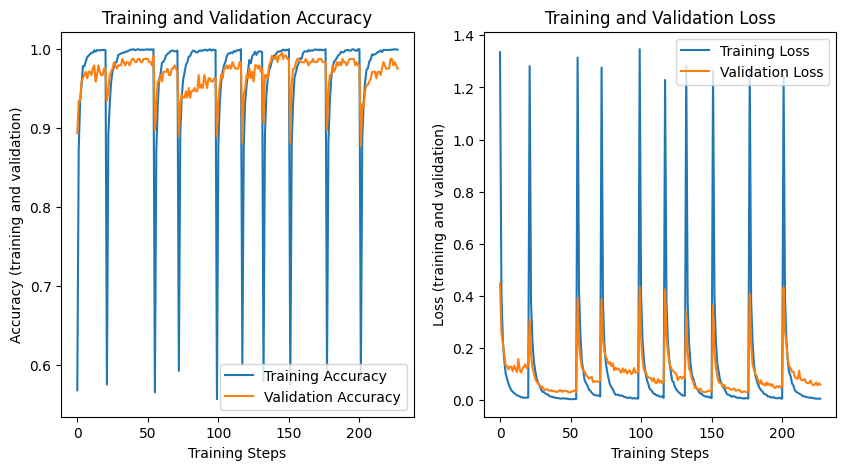

In [18]:
# Plotting the aggregated history
acc = all_history['accuracy']
val_acc = all_history['val_accuracy']
loss = all_history['loss']
val_loss = all_history['val_loss']

# Print lengths to check alignment
print("Length of accuracy:", len(acc))
print("Length of validation accuracy:", len(val_acc))
print("Length of loss:", len(loss))
print("Length of validation loss:", len(val_loss))

# Set epochs to the length of one of these arrays if they are the same
epochs = len(acc)  # Change this to match your data

epochs_range = range(epochs)

plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")

plt.show()

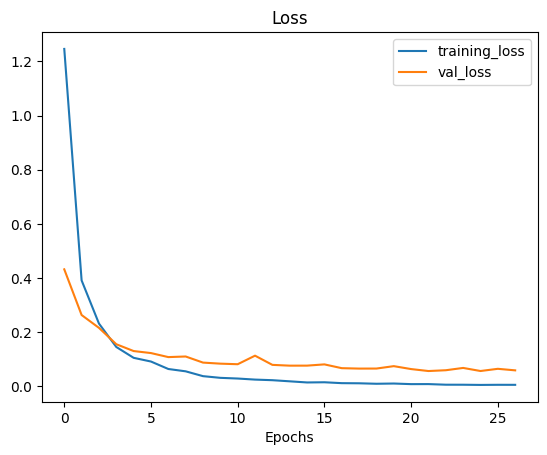

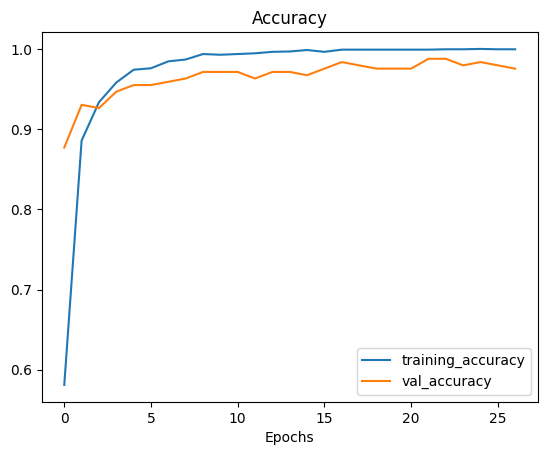

In [19]:
plot_loss_curves(history_kfold)

12/12 [==============================] - 18s 1s/step


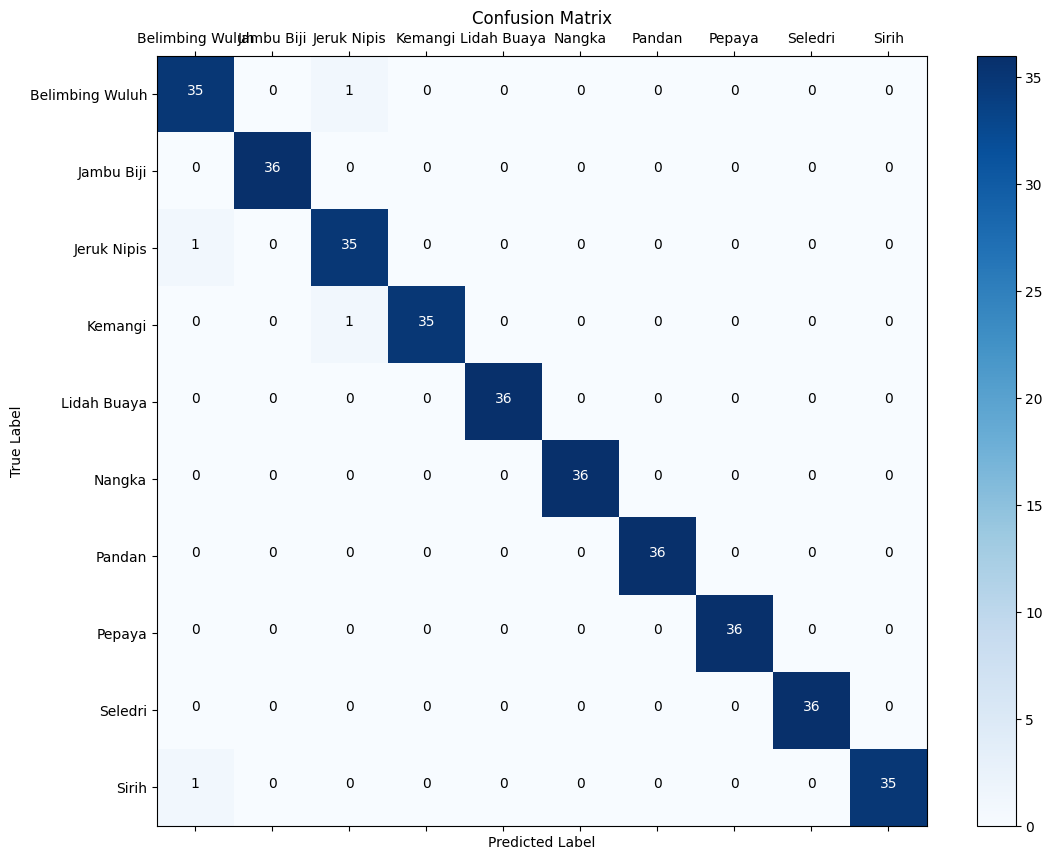

In [20]:
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(13, 10), text_size=10, savefig=False):
    # Generate the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    n_classes = cm.shape[0]

    # Create the plot
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Set labels
    if classes:
        labels = classes
    else:
        labels = np.arange(n_classes)
    ax.set(title="Confusion Matrix",
           xlabel="Predicted Label",
           ylabel="True Label",
           xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           xticklabels=labels,
           yticklabels=labels)

    # Set the threshold for text color
    threshold = (cm.max() + cm.min()) / 2.

    # Add text annotations
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]}",
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black",
                 size=text_size)

    # Save the figure if required
    if savefig:
        fig.savefig("confusion_matrix.png")

# Assuming model and test_images are defined and used previously
# Get predictions from the model on test data
test_images.reset()
predictions = model.predict(test_images)
y_pred = np.argmax(predictions, axis=1)

# Get true values from the test data
y_true = test_images.classes

# Get class labels
labels = list(test_images.class_indices.keys())

# Create confusion matrix without percentages
make_confusion_matrix(y_true, y_pred, classes=labels, figsize=(13, 10), text_size=10, savefig=True)
plt.show()

In [21]:
# Mendapatkan prediksi pada data testing
test_preds = model.predict(test_images, verbose=0)
test_pred_labels = np.argmax(test_preds, axis=1)

# Mendapatkan label sebenarnya
test_labels = test_images.classes

# Classification Report
print("Classification Report pada data testing")
print(classification_report(test_labels, test_pred_labels, target_names=list(test_images.class_indices.keys())))

Classification Report pada data testing
                 precision    recall  f1-score   support

Belimbing Wuluh       0.95      0.97      0.96        36
     Jambu Biji       1.00      1.00      1.00        36
    Jeruk Nipis       0.95      0.97      0.96        36
        Kemangi       1.00      0.97      0.99        36
    Lidah Buaya       1.00      1.00      1.00        36
         Nangka       1.00      1.00      1.00        36
         Pandan       1.00      1.00      1.00        36
         Pepaya       1.00      1.00      1.00        36
        Seledri       1.00      1.00      1.00        36
          Sirih       1.00      0.97      0.99        36

       accuracy                           0.99       360
      macro avg       0.99      0.99      0.99       360
   weighted avg       0.99      0.99      0.99       360



In [25]:
saved_model_dir = '/content/drive/MyDrive/Colab Notebooks/Daun Herbal'
tf.saved_model.save(model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open('modeldaunherbal.tflite', 'wb') as f:
  f.write(tflite_model)